In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


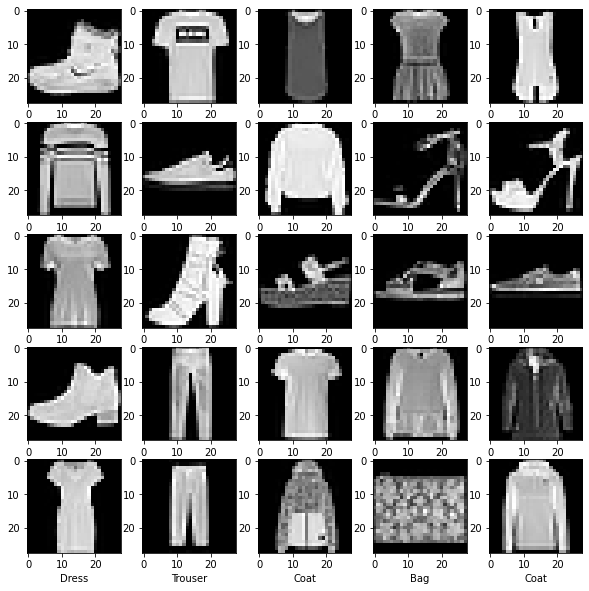

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
train_images=train_images/255
test_images=test_images/255

i. define model keras.Sequential([layers])

ii. compile the model:

  a) optimizer: how the model updates the parameter during the training, based on loss function (e.g. 'adam')

  b) loss function to minimize

  c) metrics used to monitor trainig and testing

In [19]:
# model
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(128, activation='relu'),
                           tf.keras.layers.Dense(10)
])
model.compile( optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics='accuracy')

In [20]:
# training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4956 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3718 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2911 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2438 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [21]:
# model accuracy
test_loss, test_accuracy=model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3420 - accuracy: 0.8822


In [46]:
# make predictions
# model return logit values (Log(p/(1-p))), we add a softmax layer to convert in a probability (easier to interpret)
probability_model=tf.keras.Sequential([model,
                                      tf.keras.layers.Softmax()])
test_pred=probability_model.predict(test_images)

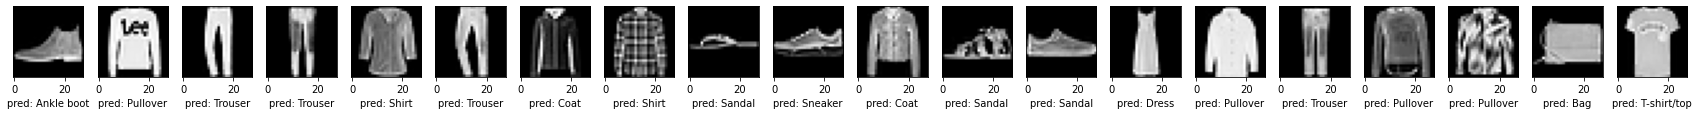

In [45]:
plt.figure(figsize=(30,30))
for i in range(20):
  plt.subplot(1, 20,i+1)
  plt.yticks([])
  #plt.xticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap='gray')
  plt.xlabel('pred: ' + class_names[np.argmax(test_pred[i])])
  #plt.xlabel(class_names[np.argmax(test_pred[i])]+" _ " + class_names[test_labels[i]])
plt.show()